# ft_linear_regression
## An introduction to machine learning
You will implement a simple linear regression with a single feature - in this case, the
mileage of the car.

In [1]:
import numpy as np
import argparse
import matplotlib.pyplot as plt


In [2]:
data = np.genfromtxt("data.csv", delimiter=',', skip_header=1)

### Data min-max normalization function:

In [3]:
def normalize(x):
    M = len(x)
    z = np.zeros(x.shape)
    for i in range(M):
        z[i] = (x[i] - np.min(x)) / (np.max(x) - np.min(x))
    return z

### Data min-max denormalization function:

In [4]:
def denormalize(x, old_x):
    M = len(x)
    z = np.zeros(x.shape)
    for i in range(M):
        z[i] = x[i] * (np.max(old_x) - np.min(old_x)) + np.min(old_x)
    return z

In [5]:
X = normalize(data[:,0])
Y = normalize(data[:,1])

### Estimate price function:
* The first program will be used to predict the price of a car for a given mileage.
When you launch the program, it should prompt you for a mileage, and then give
you back the estimated price for that mileage.

The program will use the following hypothesis to predict the price:

> estimatePrice(mileage) = $\theta$0 + ($\theta$1 ∗ mileage)

In [6]:
def estimate_price(mileage, theta0, theta1):
    return theta0 + (theta1 * mileage)

* The second program will be used to train your model. It will read your dataset
file and perform a linear regression on the data.
Once the linear regression has completed, you will save the variables theta0 and
theta1 for use in the first program.

You will be using the following formulas :
> tmp$\theta$0 = learningRate $\times$ $\frac{1}{m}$$\sum_{i=0}^{m-1}$(estimatePrice(mileage[i]) - price[i])

> tmp$\theta$1 = learningRate $\times$ $\frac{1}{m}$$\sum_{i=0}^{m-1}$(estimatePrice(mileage[i]) - price[i])) $\times$	 mileage[i]

In [7]:
def gradient_descent(X, Y, theta0, theta1, lr):
    M = len(X)
    deriv_theta0 = np.float(0)
    deriv_theta1 = np.float(0)
    for i in range(M):
        deriv_theta0 += (theta0 + (theta1 * X[i]) - Y[i])
        deriv_theta1 += ((theta0 + (theta1 * X[i]) - Y[i]) * X[i])
    tmp_theta0 = theta0 - lr * ((1 / M) * deriv_theta0)
    tmp_theta1 = theta0 - lr * ((1 /  M) * deriv_theta1)
    return tmp_theta0, tmp_theta1

### Cost function:

In [8]:
def cost_function(X, Y, theta0, theta1):
    M = len(X)
    err = np.float(0)
    for i in range(M):
        err += Y[i] - theta0 + (theta1 * X[i]) ** 2
    return err / M

### Linear Regression function:

In [9]:
def linear_regression(X, Y, lr = 0.1, epochs = 100):
    theta0 = np.float(0)
    theta1 = np.float(0)
    loss = []
    for i in range(epochs):
        theta0, theta1 = gradient_descent(X, Y, theta0, theta1, lr)
        loss.append(cost_function(X, Y, theta0, theta1))
    return theta0, theta1, loss

In [10]:
theta0, theta1, loss = linear_regression(X, Y)
denorm_X = denormalize(X, data[:,0])
denorm_Y = denormalize(Y, data[:,1])
line_x = [np.min(X), np.max(X)]
line_y = [(theta0 * i) + theta1 for i in line_x]

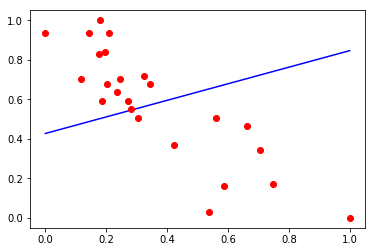

Final loss =  0.18356019812474114
Thetas =  [0.4270951471530152, 0.4190693738822352]


In [11]:
plt.plot(line_x, line_y, 'b')
plt.plot(X, Y, 'ro')
plt.show()
print('Final loss = ', loss[-1])
print('Thetas = ', [theta0, theta1])
# np.savetxt("thetas.csv", [theta1, theta0], delimiter=",")